In [261]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
# Natural Language tool kit
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [263]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Exploring the dataset

In [264]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [265]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [266]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [267]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

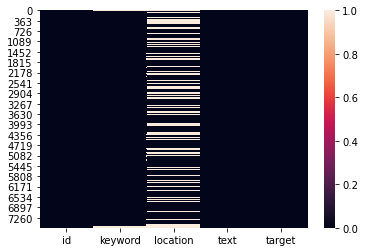

In [268]:
sns.heatmap(train_df.isnull())

In [269]:
total = train_df.shape[0]

we can see that most of the Null values are from Location and few are from keyword 

In [270]:
train_df.isnull().sum()/(train_df.shape[0])

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

we can see that 0.33% of Null values are missing which is huge amount which will make huge prediction errors, also location data might not be as useful so we can drop the data

In [271]:
train_df.drop(['location'],axis=1,inplace=True)

In [272]:
p = train_df['target'].value_counts()/(train_df.shape[0])

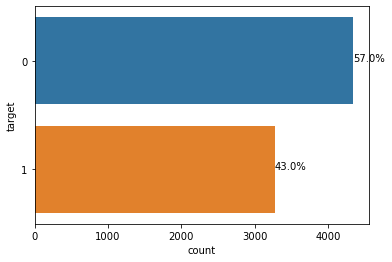

In [273]:

ax = sns.countplot(y = 'target',data=train_df)

for p in ax.patches:
    percent = '{:.1f}%'.format(100*(p.get_width()/total))
    x = p.get_x()+p.get_width()
    y = p.get_y()+(p.get_height())/2
    ax.annotate(percent,(x,y))


we can see that data is balanced

In [274]:
train_df[train_df['target'] == 0]

,id,keyword,text,target
15,23,NaN,What's up man?,0
16,24,NaN,I love fruits,0
17,25,NaN,Summer is lovely,0
18,26,NaN,My car is so fast,0
19,28,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...
7581,10833,wrecked,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,Sirens everywhere!,0


In [300]:
train_df['keyword'].dropna(inplace=True)

we can use text column to train the model, the words inside the text can indicate it is a disaster or not so we are using countvector to count the words in the tweet and turn them into data

### Next Step is Preprocessing of data in NLP.

Preprocessing of data might vary for each use cases in NLP.here we can see from the above special characters, email id and twitter user name with many complex string are given to process.We first get data between a email like

" @shawn Titanic tragedy could have been prevented Economic Times: Telegraph.co.ukTitanic tragedy could have been preve... http://bet.ly/tuN2wx"

we have to get string like "Titanic tragedy could have been prevented Economic Times Telegraph co ukTitanic tragedy could have been preve"

In [301]:
import re


In [302]:
## Removing URL's
def remove_url(text):
    newtext=" ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return newtext

Since the model can't classify strings having special charecter and emails. we are using regular expresion to remove

'(@[A-Za-z0-9]+)' indicates the string starts with @ and the string should contain Capital, small, number.'+' indicates it canbe one or more occurance of [A-Za-z0-9] thus giving @bbcmtd

'([^0-9A-Za-z \t])' indicates the string should not contain small letter, capital letter, and numbers and '\t' indicates Tabs.THus giving all the special characters like '.,:,-' etc.

'(\w+:\/\/\S+)' '\w' indicates the string should have the character of letters and numbers,'+' indicates one or more characters,followed by :'\' indicates escape which escapes / and followed by similar patter then '\S' indicates one non whitspace character.'+' indicatesz one or more of '\S' thus giving http://t.co/lHYXEOHY6C'

in order to get ms with formating we are replacing all the above regular exxpression answers with " " by using re.sub.

spliting would give the letters in list and " ".join will give sting with space. 


In [303]:
## Making text to Lower case
def lower_case(text):
    return text.lower()

## Removing numbers
def remove_num(text):
    newtext= re.sub(r'\d+',"",text)
    return newtext

## removing punctuation
def remove_punc(text):
    trans = str.maketrans("","",string.punctuation)
    return text.translate(trans)


### Preprocessing NLP methods

The most common preprocessing methods are:

> Tokenize (tokenizing means spliting string into words)

> Lemmatize (Lemmatizeing given bu eg: if we have a word (learn,learning) learning can be lemmatized to learn.)

> Removing stop words (stop wordsa are joining words used to join the text like(is,was,and,or etc.))

In [304]:
#Tokenizing
def tokenize(text):
    text = word_tokenize(text)
    return text

# Removing Stop Words
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

#Lemmatize

word_lem = WordNetLemmatizer()
#we are using recursive call since for eg: calling can be writen as (called,caller,call). So we are lemmatizing into the word call
def Lemmatize(text):
    text = [word_lem.lemmatize(token) for token in text]
    return text

# Preprocessing

def preprocess(text):
    text = lower_case(text)
    text = remove_num(text)
    text = remove_punc(text)
    text = tokenize(text)
    text = remove_stop(text)
    text = Lemmatize(text)
    text = " ".join(text)
    return text

### Train Preprocessing

In [305]:
train_preprocess = []
for i in train_df['text']:
    text_data = preprocess(i)
    train_preprocess.append(text_data)
train_df['processed_text'] = train_preprocess

the below are downloaded since it has shown error in module

In [306]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [307]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [308]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nandh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Test Data Preprocessing

In [311]:
a = test_df.shape
b = test_df.isnull().sum()
c = test_df.info()
print(a,b,c)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
(3263, 4) id             0
keyword       26
location    1105
text           0
dtype: int64 None


In [312]:
test_df.drop('location',axis=1,inplace=True)

In [313]:
test_df['keyword'].dropna(inplace=True)

In [314]:
test_preprocess = []
for i in test_df['text']:
    text_data_test = preprocess(i)
    test_preprocess.append(text_data_test)
test_df['processed_text'] = test_preprocess

In [315]:
train_df.head()

,id,keyword,text,target,processed_text
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [316]:
test_df.head()

,id,keyword,text,processed_text
0,0,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


Now we can vectorize the text data 

###### first we are using count vectorizer

In [318]:
from sklearn import feature_extraction,linear_model,preprocessing,model_selection

In [319]:
count_vect = feature_extraction.text.CountVectorizer()

In [320]:
ex_train_vec = count_vect.fit_transform(train_df['processed_text'])

In [322]:
ex_train_vec.todense().shape

(7613, 20161)

we can see there are 20161 unique text

In [323]:
ex_test_vec = count_vect.transform(test_df['processed_text'])

In [324]:
ex_test_vec.todense().shape

(3263, 20161)

In [325]:
model = linear_model.RidgeClassifier()

In [326]:
score = model_selection.cross_val_score(model,ex_train_vec,train_df['target'],cv =3)

In [327]:
score

array([0.71907013, 0.62962963, 0.70240441])

##### let Solve using tf-idf vectorisation

https://www.etutorialspoint.com/index.php/386-tf-idf-tfidfvectorizer-tutorial-with-examples

According to scikit-learn’s website, TfidfVectorizer is actually CountVectorizer followed by TfidfTransformer. CountVectorizer first takes our text documents and tokenizes them, as we did before (but then un-did because this function does not accept tokenized data as input). Once the data have been tokenized, CountVectorizer assembles a bag of words consisting of every unique token and assigning each a number. Finally, CountVectorizer represents the tokenized text data as a matrix of token counts, which looks like this:

This image shows the first six rows of the CountVectorizer matrix. These rows tell us that in document 0, the words 368, 3403, 4146, 5201, 8491, and 11223 all appear once. We are interested in these counts because if a word appears many times in a document, that word is probably very significant.
TfidfTransformer simply transforms this matrix of token counts to a term frequency-inverse document frequency (tf-idf) representation. Using tf-idf is important because simply using token counts can be misleading. Previously, we assumed that if a word appeared many times in a document, it was important. What if that word is extremely common in the entire corpus? Then it’s high frequency in our current document would be less significant, because the word appears so frequently elsewhere.
Tf-idf strikes a balance by taking the term frequency (basically the count) and multiplying it by the inverse document frequency (1/document frequency). This means that if word 1 appears once in document A but also once in the total corpus, while word 2 appears four times in document A but 16 in the total corpus, word 1 will have a tf-idf score of 1.0 while word 2 will only receive a score of 0.25. Word 2’s importance in document A is diluted by its high frequency in the corpus. (This is a simplified explanation of the actual tf-idf equation, which is more complicated.)
Hence, we arrive at this representation of document 0:

Notice that in the CountVectorizer representation, all the tokens in document 1 appeared only once. Now, in the tf-idf representation, some tokens have higher scores than others. Tf-idf has added a layer of nuance to our data.

Lets combine test_df['processed_text'] and train_df['processed_text'] into corpus.

by combining we can get the propotion of most occurance of the text 

In [328]:
train_list = list(train_df['processed_text'])
test_list = list(test_df['processed_text'])
corpus = train_list+test_list

In [329]:
corpus

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'im top hill see fire wood',
 'there emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa day ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'whats man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love ski

In [330]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
fit_vec = tfidf.fit(corpus)

In [331]:
train_trasform = tfidf.transform(train_df['processed_text'])
y = train_df['target']
test_transform = tfidf.transform(test_df['processed_text'])

In [337]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

In [338]:
cross_val = model_selection.cross_val_score(reg,train_trasform,y,cv=3)

In [339]:
cross_val

array([0.73719464, 0.67612293, 0.72960189])

In [341]:
reg.fit(train_trasform,y)

LogisticRegression()

In [342]:
predict = reg.predict(test_transform) 

In [343]:
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [344]:
sub = pd.read_csv('submission.csv')

In [346]:
sub['target'] = predict

In [347]:
sub.s

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [349]:
sub.to_csv('submission.csv',index=False)